# Projekti 2: Paulin kanava

Tässä projektissa toteutamme yleisen **Paulin kanavan** qiskitillä. 

Sovellamme tätä kvanttitermofysiikassa tärkeän suureen, erottuvan työn (extractable work), arvioimiseen. Yritämme toistaa tutkimuksen [*G. García-Pérez et al., npj Quantum Inf 6, 1 (2020)*](https://doi.org/10.1038/s41534-019-0235-y) tuloksen. 

Yleisin mahdollinen malli yhden kubitin avoimelle kvanttisysteemille on ajasta riippuva Paulin kanava. Tällöin systeemin mestariyhtälö on 
\begin{equation}
\frac{d\rho_{S} }{dt}(t)=\frac{1}{2}\sum_i\gamma_i(t)\left[\sigma_i\rho_{S}(t)\sigma_i-\rho_{S}(t)\right].
\end{equation}

Yllä olevan mestariyhtälön [[1](#1)] kuvaama dynamiikka ei yleisesti ottaen ole vaihekovariantti (phase-covariant), lukuun ottamatta tapausta, jossa $\gamma_x(t)=\gamma_y(t)$. Lisäksi koska hajoamisnopeudet voivat saada negatiivisia arvoja, täytyy asettaa ehtoja, joilla taataan täydellinen positiivisuus (complete positivity). Nämä ehdot on annettu epäyhtälöryhmän muodossa, joka sisältää kaikki kolme hajoamisnopeutta, kuten näkyy kohdassa [[2](#2)].  
<!--
**In Sec.~\ref{sec:discussion} we present the simulation of a specific form of time-dependent Pauli channel proposed in Ref.~\cite{Hall2014} and used as an example of eternal non-Markovianity, i.e.~an open quantum system dynamics for which the dynamical map is non-CP-divisible for all times $t$. More precisely, we use this experimental simulation to demonstrate a phenomenon predicted in Ref.~\cite{BognaWork}, namely the presence of oscillations in the extractable work. This shows an application of open quantum system simulation on the IBM Q Experience processors to fields other than quantum information theory, specifically quantum thermodynamics for the example here considered.** What? Is example Markovian or non-Markovian???? -->

Tiettynä ajanhetkenä $t$ Paulin kanava voidaan kirjoittaa 
\begin{equation} 
 \mathcal{E} (\rho) = \sum_{i=0}^3 p_i \sigma_i \rho \sigma_i,
\end{equation}
 
jossa $0 \leq p_i \leq 1$ ja $\sum_i p_i = 1$. Depolarisoiva kanava on Paulin kanavan erityistapaus, jossa $p_1 = p_2 = p_3 = p/4$. 

On mahdollista toteuttaa Pulin kanava vain kahta apukubittia käyttäen, jos valmistaa nämä kubitit oikeanlaiseen lomittuneeseen tilaan. Ensimmäinen kubitti toimii kontrollina CNOT-portille, eli kontrolloidulle X-portille ja toinen kubitti kontrolloidulle Y-portille. Huomaa, että porttien X ja Y käyttäminen peräkkäin vastaa Z-portin käyttöä. 

Paulin kanavaa varten tarvittava apukubittien tila $|\psi \rangle$ voidaan toteuttaa seuraavalla piirillä: 

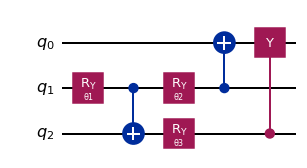

In [1]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.circuit import Parameter

#############################
#       Pauli channel       #
#############################

# Quantum register
q = QuantumRegister(3, name="q")

# Quantum circuit
pauli = QuantumCircuit(q)

# Pauli channel acting on q_2
## Qubit identification
system = 0
a_0 = 1
a_1 = 2

# ## Define rotation angles
theta_1 = Parameter('θ1')
theta_2 = Parameter('θ2')
theta_3 = Parameter('θ3')

## Construct circuit
pauli.ry(theta_1, q[a_0])
pauli.cx(q[a_0], q[a_1])
pauli.ry(theta_2, q[a_0])
pauli.ry(theta_3, q[a_1])
pauli.cx(q[a_0], q[system])
pauli.cy(q[a_1], q[system])

# Draw circuit
pauli.draw(output='mpl')

## Tehtävä 1 (1p)

Depolarisoiva kanava on Paulin kanavan erityistapaus, jossa $p_1 = p_2 = p_3 = p/4$. Se voidaan siis toteuttaa yllä olevalla piirillä. Mutta miksei yleistä Paulin kanavaa voida toteuttaa projektissa 1 käytetyllä piirillä, jos jokaisen kolmesta apukubitista sallitaan kääntyä eri kulman $\theta$ verran? 

Anna vastaesimerkki Paulin kanavasta, jota ei voida toteuttaa projektin 1 piirillä.



## Tehtävä 2 (2p)
Paulin kanavan piiritoteutuksessa keskeistä on seuraavan yhtälöryhmän inversio: 

\begin{equation}
    \begin{cases}
        p_0  = |\langle 00|\psi \rangle|^2 = (c_1 c_2 c_3 + s_1 s_2 s_3)^2 & \\
        p_1  = |\langle 01|\psi \rangle|^2 = (c_1 c_2 s_3 - s_1 s_2 c_3)^2 & \\
        p_2  = |\langle 10|\psi \rangle|^2 = (c_1 s_2 c_3 - s_1 c_2 s_3)^2 & \\
        p_3  = |\langle 11|\psi \rangle|^2 = (s_1 c_2 c_3 + c_1 s_2 s_3)^2 &
    \end{cases}
\end{equation}

where $c_i \equiv \cos 2\theta_i$ and $s_i \equiv \sin 2\theta_i$, that gives us the three angles $\theta_1$, $\theta_2$ and $\theta_3$.

Yhtälöryhmällä on useita ratkaisuja, mutta meille riittää yksi (voimme rajoittua tarkastelemaan kulmia välillä $0$ ja $2 \pi$.) 

1. *Etsi tällainen ratkaisu joko analyyttisesti (esim. Mathematicalla) tai numeerisesti (esim. käyttäen ohjelmaa `scipy.optimize.root`).*
2. *Tee funktio, joka palauttaa Paulin kanavan toteuttavan piirin listalle arvoja `[p_1, p_2, p_3]`.*

HUOM: Monet laskennalliset ohjelmat eivät välttämättä löydä ratkaisua kohtaan 2.1. Jos näin käy, voit katsoa Mathematicalla saadun tuloksen tämän tehtävän ratkaisuista. 

In [ ]:
def pauli_channel(q, p, system, pauli_ancillae):
    """
        Apply the Pauli channel to system with probabilities p
        
    Args:
    q (QuantumRegister): the quantum register for the circuit
    system (int): index of the system qubit
    pauli_ancillae (list): list of indices of the ancillary qubits
    p (list): list of probabilities [p_1, p_2, p_3] for the Pauli channel
    
    Returns:
    A QuantumCircuit implementing the Pauli channel
    """
    
    # Write code

## Tehtävä 3 (2p)

Arvioidaan, kuinka paljon työtä voidaan erottaa systeemistä pyyhkimällä pois tiedot systeemikubitistamme A, joka on alun perin valmistettu lomittuneeseen tilaan, jonka kvanttimuisti on Q.  
Tämä suure on tärkeä kvanttitermodynamiikassa. Se esiteltiin ensimmäistä kertaa tutkimuksessa *L. del Rio et al., Nature 474, 61 (2011)* ja sitä on tutkittu myös epä-Markovisessa dynamiikassa : [*B. Bylicka et al., Sci. Rep. 6, 27989 (2016)*](https://www.nature.com/articles/srep27989). (Kokeellinen toteutus IBM Q -laitteilla löytyy tästä: [*G. García-Pérez et al., npj Quantum Inf 6, 1 (2020)*](https://doi.org/10.1038/s41534-019-0235-y)). 

Toteutamme funktion, joka laskee arvoja erottuvalle työlle (extractable work) tutkimuksen [*B. Bylicka et al., Sci. Rep. 6, 27989 (2016)*](https://www.nature.com/articles/srep27989) kaavan 4 mukaisesti. Voit käyttää tämän uudelleenskaalattua versiota: 

$$\frac{W_{ex}(t)}{kT\ln{2}} = [n - S(A | Q)]$$

*Tätä varten tarvitaan ensin funktio `conditional_entropy`: se ottaa kahden kubitin tilavektorin tai tiheysoperaattorin* ja palauttaa ehdollisen entropian (conditional entropy) $S(A|B) = S(AB) - S(B)$, jossa $S$ on [von-Neumannin entropia](https://en.wikipedia.org/wiki/Von_Neumann_entropy). 

In [1]:
# Suggested imports...
from qiskit.quantum_info import entropy, partial_trace

def conditional_entropy(state, qubit_a, qubit_b):
    """Conditional entropy S(A|B) = S(AB) - S(B)
    
    Args:
        state: a vector or density operator
        qubit_a: 0-based index of the qubit A
        qubit_b: 0-based index of the qubit B
        
    Returns:
        int: the conditional entropy
    """
    # Write code here

Nyt voit toteuttaa myös funktion `extractable_work`, joka ottaa kahden kubitin systeemin ja palauttaa erottuvan työn määrään. 

In [ ]:
def extractable_work(state, system_qubit, memory_qubit, n=1):
    """Extractable work from a two-qubit state
    =
    Cfr. Eq. (4) Bylicka et al., Sci. Rep. 6, 27989 (2016)
    
    Args:
        state: a vector or density operator
        system_qubit: index of the system qubit
        memory_qubit: index of the memory qubit
        n: number of system qubits
    """
    # Write code here

## Tehtävä 4 (5p)

Toteutetaan nyt kaksi erityyppistä dynamiikkaa, ts. kaksi funktiota, jotka palauttavat p:n arvoja ajan funktiona. Toinen näistä on ei CP-jaollinen kuvaus (non-CP-divisible map, katso [Luku 8, Open Quantum Systems with Qiskit](https://matteoacrossi.github.io/open_quantum_systems_course/non-markovian_quantum_dynamics.html)). 

    p_ncp = [1/4 * (1 - np.exp(-2 * t * eta)), 
             1/4 * (1 - np.exp(-2 * t * eta)),
             1/4 * (1 + np.exp(-2 * t * eta) - 2 * np.exp(-t * eta) * np.cos(t * omega))]
         
ja toinen on pysyvästi epä-Markovinen (eternally non-Markovian) dynamiikka ([*G. García-Pérez et al., npj Quantum Inf 6, 1 (2020)*](https://doi.org/10.1038/s41534-019-0235-y)) 

    p_enm = [1/4 * (1 - np.exp(-2 * t * eta)), 
             1/4 * (1 - np.exp(-2 * t * eta)),
             1/4 * (1 + np.exp(-2 * t * eta) - 2 * np.exp(-t * eta) * np.cosh(t * omega))]

1. Kirjoita funktiot `p_ncp(t)` ja `p_enm(t)`, jotka palauttavat Paulin kanavaa simuloivan piirin ajanhetkenä t kummallekin yllä olevalle dynamiikalle. 
2. Kirjoita piiri, jossa valmistelet kaksi kubittia (systeemi ja muisti) tilaan $|\Psi^-\rangle = \frac{1}{\sqrt{2}}{(|01\rangle - |10\rangle)}$ state.
3. Käytetään seuraavia aika-askelia ja parametrien arvoja dynamiikoissa: 

        t_values = np.linspace(0, 3, 11)

        params_ncp = {'eta': 0.1, 'omega': 2.0}
        params_enm = {'eta': 1.0, 'omega': 0.5}

    Kirjoita piirit, jotka toteuttavat dynamiikat kaikilla $t$:n arvoilla `t_values`. 
   
4. Tee simulaattorilla tilatomografia kaikille piireille, ja laske ja piirrä erottuva työ ajan funktiona. Suorita piirit [`qiskit_experiments.framework.BatchExperiment`](https://qiskit.org/ecosystem/experiments/stubs/qiskit_experiments.framework.BatchExperiment.html#qiskit_experiments.framework.BatchExperiment):llä tarjoamalla lista `StateTomography`-tapauksia. Näin voit suorittaa kaikki tarvittavat piirit yhdellä pyynnöllä, mikä voi nopeuttaa kokeita esimerkiksi todellisilla kvanttilaitteilla.
5.  Piirrä myös tarkat arvot erottuvalle työlle molemmissa dynamiikoissa. 


## Valinnaiset lisätehtävät 

1. Käytä yleisen Paulin kanavan piiriä depolarisoivan kanavan toteuttamiseen oikealla laitteella, ja vertaile tuloksia edellisen projektin tulosten kanssa. Kummassa on suuremmat fideliteetit?

2. Aja yllä oleva koodi oikealla laitteella ja vertaa tuloksia simulaatioon. Katso mallia projektin 1 ratkaisuista!